### Unsupervised Learning - Clustering Task
#### Pearly - 455722

## About Star Cluster Dataset 

* This dataset contains the positions and velocities of simulated stars (particles) in a direct N-body simulation of a star cluster. In the cluster there are initially 64000 stars distributed in position-velocity space according to a King model.
* Each .csv file named cxxxx.csv corresponds to a snapshot of the simulation at time t = xxxx. 
* In general: There are 19 time snapshot, which means in total they are 19 files of csv
* For example, c0000.csv contains the initial conditions (positions and velocities of stars at time t=0). Times are measured in standard N-body units. This is a system of units where G = M = −4E = 1 (G is the gravitational constant, M the total mass of the cluster, and E its total energy).<hr>

1. column 1, 2, 3 = x, y, z (positions of the stars)


2. column 4, 5, 6 = vx, vy, vz (velocity along one direction)


3. column 7 = m (mass)
* For this simulation this is identically 1.5625e-05, i.e. 1/64000. The total mass of the cluster is initially 1.


4. column 8 = star ID
* The IDs are unique and can be used to trace the position and velocity of a star across all files. There are initially 64000 particles. At end of the simulation there are 63970. This is because some particles escape the cluster.<hr>

<i> source dataset: <a href="https://www.kaggle.com/code/smailaar/star-cluster-ml/data">Star Cluster Dataset</a> </i>


## Preprocessing Data

**Importing Dataset of 19 time snapshots**

In [1]:
import glob
import pandas as pd

# get path and 
path = 'C:\\Users\\pearly\\OneDrive\\Desktop\\University Materials\\Unsupervised Learning\\01. clustering project\\star dataset'
csv_files = glob.glob(path + "/*.csv")

count = 0
for f in csv_files:
    count += 1
    exec(f'df_{count} =pd.read_csv(f)')

**Dimension of Dataset**

In [2]:
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
df_1       DataFrame                  x         y<...>n[64000 rows x 8 columns]
df_10      DataFrame                  x         y<...>n[63984 rows x 8 columns]
df_11      DataFrame                  x         y<...>n[63983 rows x 8 columns]
df_12      DataFrame                  x         y<...>n[63983 rows x 8 columns]
df_13      DataFrame                  x         y<...>n[63981 rows x 8 columns]
df_14      DataFrame                  x         y<...>n[63981 rows x 8 columns]
df_15      DataFrame                  x         y<...>n[63978 rows x 8 columns]
df_16      DataFrame                  x         y<...>n[63977 rows x 8 columns]
df_17      DataFrame                  x         y<...>n[63976 rows x 8 columns]
df_18      DataFrame                  x         y<...>n[63973 rows x 8 columns]
df_19      DataFrame                  x         y<...>n[63970 rows x 8 columns]
df_2       DataFrame                  x         y<..

The shape of each dataframe contains different dimensions, which means not all of ID exists in each dataframe.<br>
So we need to get get intersection of ID star from "id" column

**Store all the DFs into list**

In [3]:
all_df = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,
         df_11,df_12,df_13,df_14,df_15,df_16,df_17,df_18,df_19]

**see what one of dataframes looks like**

In [4]:
df_1.head(4)

,x,y,z,vx,vy,vz,m,id
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,1
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016,2
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,3
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016,4


#### Spotting outliers using Z-Score

 Z score tells how many standard deviations away a data point is from the mean. If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.
 $$ Z-score = \frac{(x -mean)}{std.deviation}$$

In [5]:
from scipy import stats
import numpy as np

In [6]:
# 1. define function for detecting and removing outlier 
def outlier(df):
    m = df[['m']]
    star_id = df[['id']]
    cols = ['x','y','z','vx','vy','vz']
    z = stats.zscore(df[cols])
    z['m'] = m
    z['id'] = star_id
    
    # detect outliers with treshold of zscore >3
    z = z[(np.abs(z[cols]>3)).any(axis=1)]
    
    # remove outliers
    df = df[~df['id'].isin(z['id'])]
    return df

In [7]:
# 2. apply to all dataframe
count = 0
for i in all_df:
    count += 1
    exec(f'df_{count} =outlier(i)')

In [8]:
# 3. updating all_df with removed outliers
all_df = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,
         df_11,df_12,df_13,df_14,df_15,df_16,df_17,df_18,df_19]

**Get intersecton of ID Star**

as we could see from the previous shape of dataframes for each 19 snapshots, they have different shapes,
which means not all of ID exists in each dataframe. We need to get get intersection of ID star from "id" column
so, that all dataframes contains the same ID of stars

In [9]:
# 1. store all values from "ID" columns from all dataframes
# into a list 'all_stars_id'

all_stars_id = []
for i in all_df:
    stars_id = i['id']
    all_stars_id.append(stars_id)

# 2. get the intersected id between all dataframes
# it returns into a set datatype

intersected_star_id = set.intersection(*map(set,all_stars_id))
# convert into list
intersected_star_id = list(intersected_star_id)
type(intersected_star_id)

# 3. create a function to filtering the id

def filter_df_id(df,list):
    df = df[df['id'].isin(list)]
    return df

# 4. apply function to all dataframes
count = 0
for i in all_df:
    count += 1
    exec(f'df_{count} =filter_df_id(i,intersected_star_id)')
    
# 5. updating all_df with a new intersected stars id
all_df = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,
         df_11,df_12,df_13,df_14,df_15,df_16,df_17,df_18,df_19]


In [10]:
count = 1
for i in all_df:
    print ("shape of df_"+str(count)+": "+ str(i.shape))
    count += 1

shape of df_1: (51526, 8)
shape of df_2: (51526, 8)
shape of df_3: (51526, 8)
shape of df_4: (51526, 8)
shape of df_5: (51526, 8)
shape of df_6: (51526, 8)
shape of df_7: (51526, 8)
shape of df_8: (51526, 8)
shape of df_9: (51526, 8)
shape of df_10: (51526, 8)
shape of df_11: (51526, 8)
shape of df_12: (51526, 8)
shape of df_13: (51526, 8)
shape of df_14: (51526, 8)
shape of df_15: (51526, 8)
shape of df_16: (51526, 8)
shape of df_17: (51526, 8)
shape of df_18: (51526, 8)
shape of df_19: (51526, 8)


Now all the dataframes consist of the same star IDs

**Concatenating all DFs to bigdataframe**

In [11]:
# 1. function to add column time
# before concatenating all dataframes -> adding "time" column to show the time

def adding_time (df,t):
    df['time'] = t
    return df

# 2. apply to all dataframes
t = 0
for df in all_df:
    t += 1
    exec(f'df_{t} =adding_time(df,t)')

In [12]:
# 3. merge all dataframes into bigdataframe
big_df = pd.concat(all_df, axis = 0)

In [13]:
print(big_df.columns)
print(big_df.loc[big_df['time']==1].shape)

Index(['x', 'y', 'z', 'vx', 'vy', 'vz', 'm', 'id', 'time'], dtype='object')
(51526, 9)


**Normalization**

In [14]:
import numpy as np

In [15]:
# normalizing the coordinates (x,y,z), velocities (vx,vy,vz), mass (m)

col = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'm']
big_df[col] = big_df[col]/np.linalg.norm(big_df[col])

In [16]:
big_df

,x,y,z,vx,vy,vz,m,id,time
0,0.000380,-0.000410,-0.000416,0.000361,-0.000026,-0.000252,1.221336e-08,1,1
1,-0.000052,0.000063,-0.000216,-0.000450,0.000866,-0.000229,1.221336e-08,2,1
2,-0.000027,0.000060,-0.000306,-0.000433,-0.000136,0.000046,1.221336e-08,3,1
3,0.001174,0.001128,0.001133,-0.000071,0.000255,-0.000243,1.221336e-08,4,1
4,-0.000007,0.000421,-0.000209,0.000009,-0.000009,-0.000317,1.221336e-08,5,1
...,...,...,...,...,...,...,...,...,...
63965,0.000099,0.000142,-0.002318,-0.000146,-0.000200,-0.000125,1.221336e-08,63996,19
63966,0.000507,0.000479,-0.000328,-0.000376,-0.000229,0.000606,1.221336e-08,63997,19
63967,-0.000019,0.000055,-0.000130,0.000112,-0.000153,0.000580,1.221336e-08,63998,19
63968,-0.000022,-0.000128,-0.000033,0.000279,-0.000152,0.000437,1.221336e-08,50629,19


In [17]:
big_df.describe()

,x,y,z,vx,vy,vz,m,id,time
count,978994.000000,978994.000000,9.789940e+05,9.789940e+05,9.789940e+05,9.789940e+05,9.789940e+05,978994.000000,978994.000000
mean,-0.000038,0.000037,-1.725494e-06,-1.011983e-06,-1.300313e-06,-8.111002e-07,1.221336e-08,31985.545103,10.000000
std,0.000484,0.000486,4.837771e-04,3.230557e-04,3.240378e-04,3.238589e-04,2.232892e-19,18476.667597,5.477228
min,-0.004398,-0.004523,-4.706888e-03,-1.327404e-03,-1.365176e-03,-1.317281e-03,1.221336e-08,1.000000,1.000000
25%,-0.000259,-0.000186,-2.234113e-04,-2.214637e-04,-2.225362e-04,-2.219286e-04,1.221336e-08,15965.000000,5.000000
50%,-0.000038,0.000039,-6.423531e-07,6.443163e-08,-4.303042e-07,-4.736924e-08,1.221336e-08,32018.000000,10.000000
75%,0.000186,0.000262,2.221144e-04,2.205875e-04,2.212069e-04,2.214578e-04,1.221336e-08,47965.000000,15.000000
max,0.002532,0.002822,2.657420e-03,9.602489e-04,9.624987e-04,9.618846e-04,1.221336e-08,64000.000000,19.000000


## Visualization
#### interactive scatter plot map

In [18]:
# 1. Import libraries for interactive plot
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [19]:
# 2. Import libraries fot 3D plot
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# 3. making a slider for time 
selection_range_slider = widgets.IntSlider(
    min=1,
    max=19,
    step=1,
    description='Time:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout={'width': '500px'}
)

In [21]:
# 4. function for 3D scatter plot
def plot_3d (selection_range_slider):
    
    # selection of the time
    big_df[big_df['time'] == selection_range_slider]
    
    # Creating dataset
    x = big_df[big_df['time'] == selection_range_slider]['x']
    y = big_df[big_df['time'] == selection_range_slider]['y']
    z = big_df[big_df['time'] == selection_range_slider]['z']
    x_min = big_df['x'].min()
    x_max = big_df['x'].max()
    y_min = big_df['y'].min()
    y_max = big_df['y'].max()
    z_min = big_df['z'].min()
    z_max = big_df['z'].max()
    
    # Creating figure
    fig = plt.figure(figsize = (9, 6))
    ax = plt.axes(projection ="3d")
    color_map = plt.get_cmap('winter')
    
    # Creating #3D plot
    p = ax.scatter3D(x,y,z,c=(x+y+z),cmap=color_map,s=1)
    fig.colorbar(p)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.title("star plot, t="+str(selection_range_slider))
    
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    
    # show plot
    return plt.show()


In [22]:
# 5. interact between slider & 3D scatter plot function
%matplotlib notebook
interact(plot_3d, selection_range_slider = selection_range_slider)

interactive(children=(IntSlider(value=1, continuous_update=False, description='Time:', layout=Layout(width='50…

<function __main__.plot_3d(selection_range_slider)>

## K-Means Elbow method

In [26]:
from sklearn.cluster import KMeans

**Find the optimal number of clusters for each time snapshot**

In [27]:
# define function
def find_cluster(df, time):
    df = df.drop(['id'],axis=1)
    df = df[df['time']==time]
    
    distortions = []
    cluster = range(1,20)
    
    for c in cluster:
        kmeanModel = KMeans(n_clusters=c)
        kmeanModel.fit(df)
        distortions.append(kmeanModel.inertia_)
        
    return cluster, distortions

**Plot every time snapshot**

In [28]:
time_1 = pd.DataFrame(find_cluster(df=big_df,time=1)).T
time_2 = pd.DataFrame(find_cluster(df=big_df,time=2)).T
time_3 = pd.DataFrame(find_cluster(df=big_df,time=3)).T
time_4 = pd.DataFrame(find_cluster(df=big_df,time=4)).T
time_5 = pd.DataFrame(find_cluster(df=big_df,time=5)).T
time_6 = pd.DataFrame(find_cluster(df=big_df,time=6)).T

In [29]:
time_7 = pd.DataFrame(find_cluster(df=big_df,time=7)).T
time_8 = pd.DataFrame(find_cluster(df=big_df,time=8)).T
time_9 = pd.DataFrame(find_cluster(df=big_df,time=9)).T
time_10 = pd.DataFrame(find_cluster(df=big_df,time=10)).T
time_11 = pd.DataFrame(find_cluster(df=big_df,time=11)).T
time_12 = pd.DataFrame(find_cluster(df=big_df,time=12)).T

In [30]:
time_13 = pd.DataFrame(find_cluster(df=big_df,time=13)).T
time_14 = pd.DataFrame(find_cluster(df=big_df,time=14)).T
time_15 = pd.DataFrame(find_cluster(df=big_df,time=15)).T
time_16 = pd.DataFrame(find_cluster(df=big_df,time=16)).T
time_17 = pd.DataFrame(find_cluster(df=big_df,time=17)).T
time_18 = pd.DataFrame(find_cluster(df=big_df,time=18)).T

In [31]:
time_19 = pd.DataFrame(find_cluster(df=big_df,time=19)).T

<IPython.core.display.Javascript object>


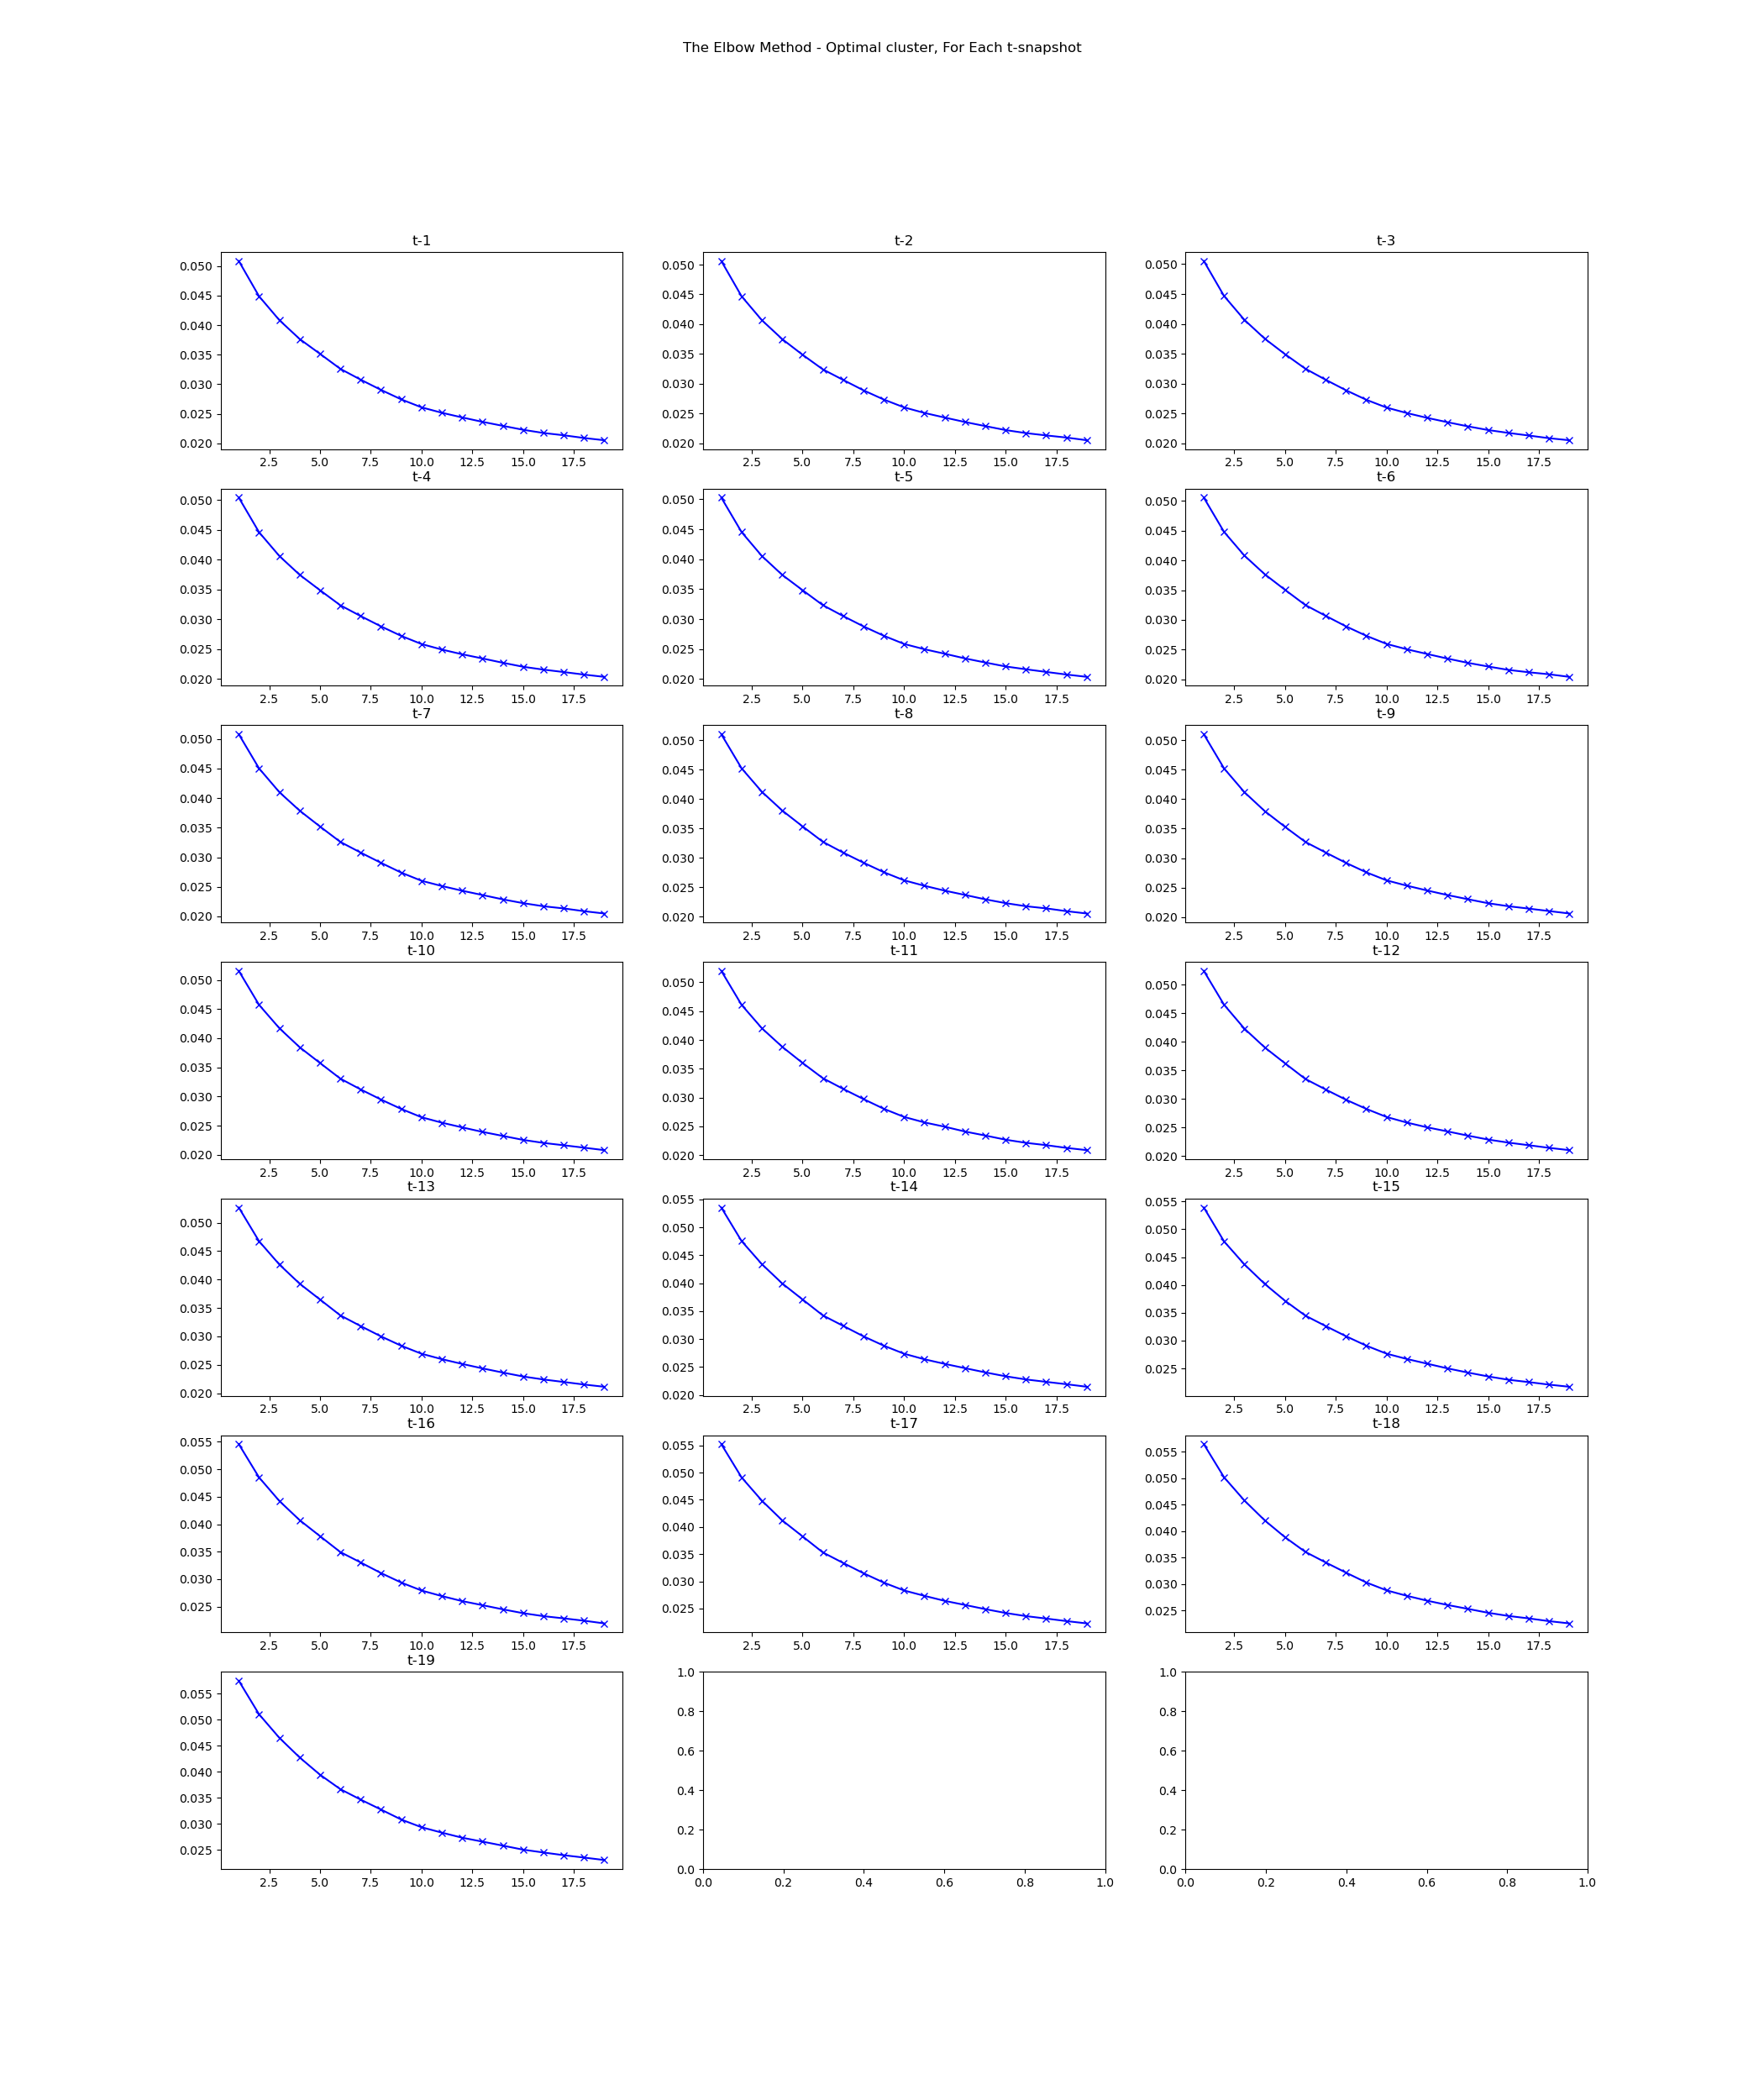

Text(0.5, 1.0, 't-19')

In [55]:
%matplotlib notebook
fig,ax = plt.subplots(7,3,figsize=(21,25))
fig.suptitle('The Elbow Method - Optimal cluster, For Each t-snapshot')
# 1st row
ax[0][0].plot(time_1[0],time_1[1],'-bx')
ax[0][0].set_title('t-1')
ax[0][1].plot(time_2[0],time_2[1],'-bx')
ax[0][1].set_title('t-2')
ax[0][2].plot(time_3[0],time_3[1],'-bx')
ax[0][2].set_title('t-3')
# 2nd row
ax[1][0].plot(time_4[0],time_4[1],'-bx')
ax[1][0].set_title('t-4')
ax[1][1].plot(time_5[0],time_5[1],'-bx')
ax[1][1].set_title('t-5')
ax[1][2].plot(time_6[0],time_6[1],'-bx')
ax[1][2].set_title('t-6')
# 3rd row
ax[2][0].plot(time_7[0],time_7[1],'-bx')
ax[2][0].set_title('t-7')
ax[2][1].plot(time_8[0],time_8[1],'-bx')
ax[2][1].set_title('t-8')
ax[2][2].plot(time_9[0],time_9[1],'-bx')
ax[2][2].set_title('t-9')
# 4th row
ax[3][0].plot(time_10[0],time_10[1],'-bx')
ax[3][0].set_title('t-10')
ax[3][1].plot(time_11[0],time_11[1],'-bx')
ax[3][1].set_title('t-11')
ax[3][2].plot(time_12[0],time_12[1],'-bx')
ax[3][2].set_title('t-12')
# 5th row
ax[4][0].plot(time_13[0],time_13[1],'-bx')
ax[4][0].set_title('t-13')
ax[4][1].plot(time_14[0],time_14[1],'-bx')
ax[4][1].set_title('t-14')
ax[4][2].plot(time_15[0],time_15[1],'-bx')
ax[4][2].set_title('t-15')
# 6th row
ax[5][0].plot(time_16[0],time_16[1],'-bx')
ax[5][0].set_title('t-16')
ax[5][1].plot(time_17[0],time_17[1],'-bx')
ax[5][1].set_title('t-17')
ax[5][2].plot(time_18[0],time_18[1],'-bx')
ax[5][2].set_title('t-18')
# 7th row
ax[6][0].plot(time_19[0],time_19[1],'-bx')
ax[6][0].set_title('t-19')


In [33]:
# No. of clusters chosen for each snapshot
time = list(range(1,20))
cluster = [5,5,5,4,5,5,5,5,5,5,4,4,5,4,4,4,4,4,5]
nocluster_chosen = pd.DataFrame(list(zip(time,cluster)),columns = ['time','cluster'])

In [34]:
print("big_df.columns: " + str(big_df.columns))
print("nocluster_chosen.columns: " + str(nocluster_chosen.columns))

big_df.columns: Index(['x', 'y', 'z', 'vx', 'vy', 'vz', 'm', 'id', 'time'], dtype='object')
nocluster_chosen.columns: Index(['time', 'cluster'], dtype='object')


## Clustering

In [35]:
#1. function for kmeans model, based on time
def kmean_model(big_df,nocluster_chosen,t):

    # filtering time , columns, no.cluster_chosen
    big_df = big_df.loc[big_df['time']==t]
    used_cols = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'm']
    nocluster_chosen = nocluster_chosen.loc[nocluster_chosen['time']==t]
    
    # fitting the model of kmeans based on no.cluster chosen
    kmeanModel = KMeans(n_clusters=nocluster_chosen.iloc[0]['cluster'])
    kmeanModel.fit(big_df[used_cols])
    
    # labels of the clusters
    cluster = kmeanModel.labels_
    big_df['cluster'] = cluster
    
    # finding the cluster centers
    centers = kmeanModel.cluster_centers_
    centers = pd.DataFrame(centers)
    centers['time'] = t
    
    return big_df, centers

In [36]:
# 2. apply a function and generate them into big_df
times = list(range(1,20))
all_dfs = []
for time in times:
    df = kmean_model(big_df,nocluster_chosen,t=time)[0] # take the first return value
    all_dfs.append(df)

# 3. generate them into big_df with cluster class
big_df_cluster = pd.concat(all_dfs,axis=0)

C:\Users\pearly\AppData\Local\Temp\ipykernel_17212\678735598.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pearly\AppData\Local\Temp\ipykernel_17212\678735598.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pearly\AppData\Local\Temp\ipykernel_17212\678735598.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [37]:
big_df_cluster.columns

Index(['x', 'y', 'z', 'vx', 'vy', 'vz', 'm', 'id', 'time', 'cluster'], dtype='object')

In [38]:
# 4 dataframe of centers based on time
times = list(range(1,20))
centers_df_list = []
for time in times:
    df = kmean_model(big_df,nocluster_chosen,t=time)[1] # take the second return value
    centers_df_list.append(df)

# 5. generate them into big_df with cluster class
centers_df = pd.concat(centers_df_list,axis=0)

C:\Users\pearly\AppData\Local\Temp\ipykernel_17212\678735598.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pearly\AppData\Local\Temp\ipykernel_17212\678735598.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pearly\AppData\Local\Temp\ipykernel_17212\678735598.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [39]:
centers_df.columns

Index([0, 1, 2, 3, 4, 5, 6, 'time'], dtype='object')

## Cluster Visualization

**Plot the centrals and the star clusters**

In [40]:
# %matplotlib notebook
def plot_centers_starclusters (selection_range_slider):
    # 1. plotting centers of clusters
    # 1. selection of the time
    centers_time = centers_df.loc[centers_df['time']==selection_range_slider]
    
    # 1. creating dataset to plot centers of cluster
    x = centers_time[0]
    y = centers_time[1]
    z = centers_time[2]
    x_min = centers_time[0].min()
    x_max = centers_time[0].max()
    y_min = centers_time[1].min()
    y_max = centers_time[1].max()
    z_min = centers_time[2].min()
    z_max = centers_time[2].max()
    
    # 1. Creating figure
    fig = plt.figure(figsize = (9, 12))
    
    # 1. Creating 3D plot centers
    ax = fig.add_subplot(2, 1, 1, projection='3d')
    color_map = plt.get_cmap('winter')
   
    p = ax.scatter3D(x,y,z,c=(x+y+z),cmap=color_map,s=50)
    fig.colorbar(p)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.title("Centers Plot")
    
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    
    # 2. plotting the star clusters
    ax = fig.add_subplot(2, 1, 2, projection='3d')
    
    # 2. selection of the time
    big_df_cluster_time = big_df_cluster[big_df_cluster['time'] == selection_range_slider]
    
    # 2. Creating dataset
    x = big_df_cluster_time['x']
    y = big_df_cluster_time['y']
    z = big_df_cluster_time['z']
    x_min = big_df_cluster_time['x'].min()
    x_max = big_df_cluster_time['x'].max()
    y_min = big_df_cluster_time['y'].min()
    y_max = big_df_cluster_time['y'].max()
    z_min = big_df_cluster_time['z'].min()
    z_max = big_df_cluster_time['z'].max()
    
    color_map = plt.get_cmap('winter')
    
    # 2. Creating #3D plot
    p = ax.scatter3D(x,y,z,c=big_df_cluster_time['cluster'],cmap=color_map,s=1)
    fig.colorbar(p)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.title("Star Clusters Plots, t="+str(selection_range_slider))
    
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    
    # show plot
    return plt.show()

In [56]:
%matplotlib notebook
interact(plot_centers_starclusters, selection_range_slider = selection_range_slider)

interactive(children=(IntSlider(value=1, continuous_update=False, description='Time:', layout=Layout(width='50…

<function __main__.plot_centers_starclusters(selection_range_slider)>

## Star Movement Visualization

As for the parameter of **mass** is like a constant in every snapshot of time, it will be dropped out from the visualization. <br>The visualization is going to focus on the velocity changes and their effect to the coordinates of the stars<br>

In [42]:
big_df_cluster.head(5)

,x,y,z,vx,vy,vz,m,id,time,cluster
0,0.000380,-0.000410,-0.000416,0.000361,-0.000026,-0.000252,1.221336e-08,1,1,0
1,-0.000052,0.000063,-0.000216,-0.000450,0.000866,-0.000229,1.221336e-08,2,1,4
2,-0.000027,0.000060,-0.000306,-0.000433,-0.000136,0.000046,1.221336e-08,3,1,4
3,0.001174,0.001128,0.001133,-0.000071,0.000255,-0.000243,1.221336e-08,4,1,1
4,-0.000007,0.000421,-0.000209,0.000009,-0.000009,-0.000317,1.221336e-08,5,1,1


In [43]:
# see how clusters from time to time for each ID
x = big_df_cluster[['id','time','cluster']]
c_timeDf = pd.pivot(x,index=['id'],columns='time',values='cluster')

In [44]:
c_timeDf.reset_index()

time,id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,0,0,0,0,0,2,1,3,0,1,3,0,1,1,0,3,3,2,1
1,2,4,4,0,0,2,3,3,3,3,2,2,0,2,2,2,3,1,1,1
2,3,4,4,1,1,0,3,3,1,3,1,0,0,1,1,0,0,3,0,1
3,4,1,0,0,1,0,4,2,4,2,0,3,0,4,3,0,3,3,3,3
4,5,1,2,1,0,2,1,1,3,3,1,3,0,1,1,2,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51521,63996,3,4,3,1,3,4,2,4,4,0,3,3,3,3,2,2,0,2,4
51522,63997,2,2,0,2,0,2,4,1,4,1,2,0,2,2,1,0,3,2,4
51523,63998,4,1,4,1,0,3,2,3,3,1,0,3,2,3,0,1,1,1,1
51524,63999,1,4,0,3,1,0,2,2,1,2,0,3,1,1,0,3,1,0,1


**taking 30 data sampling**

In [45]:
c_time = c_timeDf.sample(n = 30, random_state = 2).reset_index()

In [46]:
c_time.head(4)

time,id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,21194,4,2,0,0,2,1,3,2,4,3,1,0,1,0,2,3,1,3,1
1,27920,1,2,1,1,1,2,3,2,2,1,0,3,1,2,2,0,1,0,0
2,50326,4,4,1,1,2,3,3,1,3,2,3,0,1,2,0,3,1,3,1
3,9049,1,4,0,1,2,3,3,1,3,1,0,3,2,1,2,3,1,0,1


**visualization for 30 samplings**

In [47]:
starId_options = widgets.Dropdown(
    options=list(c_time['id']),
    value=5072,
    description='ID star:',
    disabled=False,
)

In [48]:
# get intersected
c_sampled_df = big_df_cluster[big_df_cluster.id.isin(c_time.id)]
c_sampled_df.head(4)

,x,y,z,vx,vy,vz,m,id,time,cluster
637,0.000101,-0.000044,0.000111,0.000067,-0.000501,-0.000284,1.221336e-08,638,1,1
1400,0.000199,-0.000517,-0.000271,-0.000524,-0.000024,-0.000321,1.221336e-08,1401,1,0
3486,0.000046,-0.000055,-0.001082,0.000338,-0.000016,-0.000250,1.221336e-08,3487,1,0
5071,0.000133,-0.000502,-0.000111,0.000085,0.000263,-0.000293,1.221336e-08,5072,1,4


In [49]:
c_sampled_df.head(4)

,x,y,z,vx,vy,vz,m,id,time,cluster
637,0.000101,-0.000044,0.000111,0.000067,-0.000501,-0.000284,1.221336e-08,638,1,1
1400,0.000199,-0.000517,-0.000271,-0.000524,-0.000024,-0.000321,1.221336e-08,1401,1,0
3486,0.000046,-0.000055,-0.001082,0.000338,-0.000016,-0.000250,1.221336e-08,3487,1,0
5071,0.000133,-0.000502,-0.000111,0.000085,0.000263,-0.000293,1.221336e-08,5072,1,4


In [50]:
c_sampled_df[c_sampled_df['id']==638].head(4)

,x,y,z,vx,vy,vz,m,id,time,cluster
637,0.000101,-0.000044,0.000111,0.000067,-0.000501,-0.000284,1.221336e-08,638,1,1
636,0.000096,-0.000110,0.000009,0.000381,0.000045,-0.000335,1.221336e-08,638,2,4
636,0.000078,0.000039,-0.000145,0.000102,0.000164,0.000400,1.221336e-08,638,3,0
636,0.000118,-0.000108,-0.000168,-0.000043,-0.000017,0.000266,1.221336e-08,638,4,1


In [51]:
# %matplotlib notebook
def velocity_changes(starId_options):
    
    # Creating dataset
    time = list(range(1,20))
    vx = c_sampled_df.loc[c_sampled_df['id']==starId_options]['vx']
    vy = c_sampled_df.loc[c_sampled_df['id']==starId_options]['vy']
    vz = c_sampled_df.loc[c_sampled_df['id']==starId_options]['vz']
    c = c_sampled_df.loc[c_sampled_df['id']==starId_options]['cluster']
    
    plt.figure(figsize=(10,5))
    
    plt.plot(time,vx, label='vx',linestyle=':',marker='o',markersize=3)
    plt.plot(time,vy, label='vy',linestyle=':',marker='o',markersize=3)
    plt.plot(time,vz, label='vz',linestyle=':',marker='o',markersize=3)
    plt.legend()
    plt.xticks(range(0,20))
    plt.title("velocity")

    # show plot
    return plt.show

In [52]:
# %matplotlib notebook
def star_movement(starId_options,selection_range_slider):
    #####################################
    # 1. plotting star movement based on their ID
    # 1. selection of the time
    id_time_df = c_sampled_df[c_sampled_df['id'] == starId_options]
    
    # 1. Creating dataset
    x = id_time_df['x']
    y = id_time_df['y']
    z = id_time_df['z']
    x_min = id_time_df['x'].min()
    x_max = id_time_df['x'].max()
    y_min = id_time_df['y'].min()
    y_max = id_time_df['y'].max()
    z_min = id_time_df['z'].min()
    z_max = id_time_df['z'].max()
    labels = id_time_df['time']
    
    # 1. Creating figure
    fig = plt.figure(figsize = (9, 13))
    ax = fig.add_subplot(2, 1, 1, projection='3d')
    color_map = plt.get_cmap('winter')
    
    # 1. Creating #3D plot
    p = ax.scatter3D(x,y,z,c=(x+y+z),cmap=color_map,s=50)
    fig.colorbar(p)
    
    for i,j,k,label in zip(x,y,z,labels):
        ax.text(i,j,k,label)
        
    plt.axis([x_min, x_max, y_min, y_max])
    plt.title("star movement within time, id: "+str(starId_options))
    
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    
    #####################################
    # 2. plotting centers of clusters
    # 2. selection of the time
    centers_time = centers_df.loc[centers_df['time']==selection_range_slider]
    
    # 2. creating dataset to plot centers of cluster
    x = centers_time[0]
    y = centers_time[1]
    z = centers_time[2]
    x_min = centers_time[0].min()
    x_max = centers_time[0].max()
    y_min = centers_time[1].min()
    y_max = centers_time[1].max()
    z_min = centers_time[2].min()
    z_max = centers_time[2].max()
    
    # 2. Creating 3D plot centers
    ax = fig.add_subplot(2, 1, 2, projection='3d')
    color_map = plt.get_cmap('winter')
   
    p = ax.scatter3D(x,y,z,c=(x+y+z),cmap=color_map,s=50)
    fig.colorbar(p)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.title("Centers Plot in time : "+ str(selection_range_slider))
    
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    
    # show plot
    return plt.show

In [57]:
%matplotlib notebook
interact(star_movement, starId_options = starId_options,selection_range_slider=selection_range_slider)

interactive(children=(Dropdown(description='ID star:', index=23, options=(21194, 27920, 50326, 9049, 62603, 37…

<function __main__.star_movement(starId_options, selection_range_slider)>

In [58]:
%matplotlib notebook
interact(velocity_changes, starId_options = starId_options)

interactive(children=(Dropdown(description='ID star:', index=23, options=(21194, 27920, 50326, 9049, 62603, 37…

<function __main__.velocity_changes(starId_options)>

<hr><hr>It's pretty obvious that velocity from each direction axis of x, y , and z has a huge impact where the star is going to be in the coordinate space. As the star moves in certain velocity, the star will also be in different cluster.<hr>